<a href="https://colab.research.google.com/github/Parinda29/MIR-Analysis/blob/main/MlProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from wordcloud import WordCloud
import re


In [3]:
#Upload Dataset
from google.colab import files
uploaded = files.upload()


Saving Musical_instruments_reviews2 (1).csv to Musical_instruments_reviews2 (1).csv


In [4]:
#Checking dataset
!ls


'Musical_instruments_reviews2 (1).csv'	 sample_data


In [5]:
import pandas as pd

# Get the uploaded file name automatically
file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)
df.head()


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,division
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014",positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013",positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013",positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014",positive


In [7]:
#Checking nunique data
df['division'].nunique()

3

In [8]:
#Checking unique data
df['division'].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

In [9]:
#Counting Values
df['division'].value_counts()

,count
division,
positive,5898
neutral,772
negative,467


In [10]:
# Lowercase, remove punctuation, extra spaces
cleaned_texts = []
for text in df['reviewText']:
    text = str(text).lower()  # lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # remove non alphabetic chars
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    cleaned_texts.append(text)

# Adding cleaned text to dataframe
df['clean_text'] = cleaned_texts

# View first rows
df[['reviewText','clean_text']].head()


,reviewText,clean_text
0,"Not much to write about here, but it does exac...",not much to write about here but it does exact...
1,The product does exactly as it should and is q...,the product does exactly as it should and is q...
2,The primary job of this device is to block the...,the primary job of this device is to block the...
3,Nice windscreen protects my MXL mic and preven...,nice windscreen protects my mxl mic and preven...
4,This pop filter is great. It looks and perform...,this pop filter is great it looks and performs...


In [11]:
# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english',
                        #max_features=2000 Naive Bayes Accuracy: 0.8256302521008403, Logistic Regression Accuracy: 0.8382352941176471
                        #max_features=3000 Naive Bayes Accuracy: 0.8242296918767507, Logistic Regression Accuracy: 0.8403361344537815
                        #max_features=4000 Naive Bayes Accuracy: 0.8249299719887955, Logistic Regression Accuracy: 0.8368347338935574
                        #max_features=4000 Naive Bayes Accuracy: 0.8249299719887955, Logistic Regression Accuracy: 0.8368347338935574
                        max_features=5000
                        )


# Fit and transform the cleaned text
X_tfidf = tfidf.fit_transform(df['clean_text'])

print("TF-IDF feature matrix shape:", X_tfidf.shape)


TF-IDF feature matrix shape: (7137, 5000)


In [13]:
# assuming this is positive/negative sentiment
y = df['division']

In [15]:
#sperating data into training and tesing
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (5709, 5000)
Test shape: (1428, 5000)


In [16]:
## Training and evaluating a Multinomial Naive Bayes model

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

# Evaluation
print("Naive Bayes Classification Report:\n")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Classification Report:

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        93
     neutral       0.00      0.00      0.00       155
    positive       0.83      1.00      0.90      1180

    accuracy                           0.82      1428
   macro avg       0.28      0.33      0.30      1428
weighted avg       0.68      0.82      0.75      1428



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
from sklearn.metrics import accuracy_score

# Naive Bayes Accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)


Naive Bayes Accuracy: 0.8249299719887955


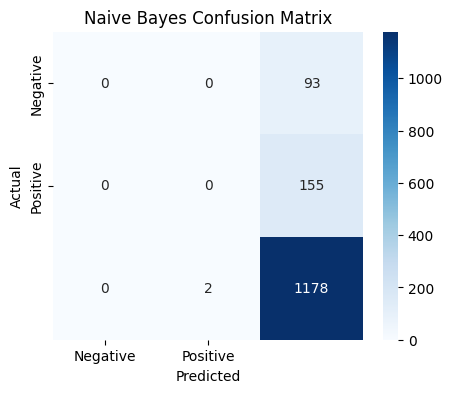

In [19]:
## Confusion matrix of the Naive Bayes model to show actual vs predicted classifications
cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(5,4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()